Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.8781 - loss: 0.3883 - val_accuracy: 0.9832 - val_loss: 0.0592
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9843 - loss: 0.0526 - val_accuracy: 0.9880 - val_loss: 0.0410
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9889 - loss: 0.0370 - val_accuracy: 0.9913 - val_loss: 0.0338
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.9905 - val_loss: 0.0325
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9905 - val_loss: 0.0336
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9850 - loss: 0.0430
Test Accuracy: 0.9879999756813049


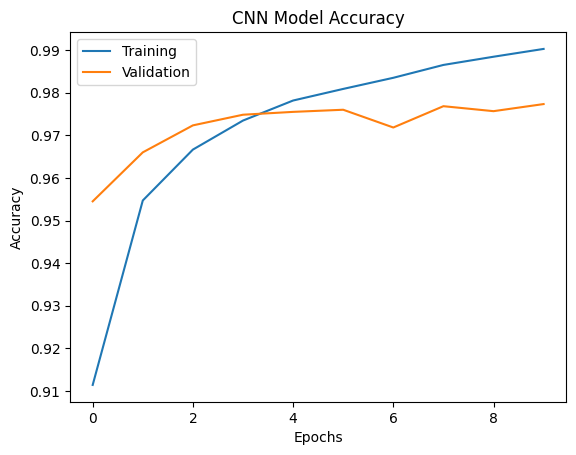

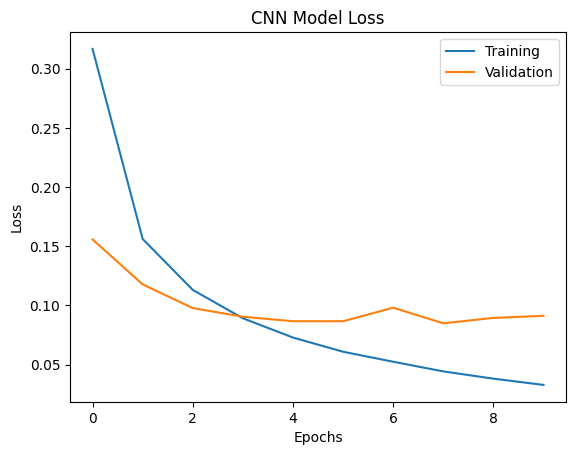

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1) / 255.0
x_test = x_test.reshape(10000, 28, 28, 1) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Model Loss')
plt.legend(['Training', 'Validation'])
plt.show()